**Збіжність методу найскорішого спуску при мінімізації функції Розенброка**

## Імпорт бібліотек та допоміжних функцій

1.   numpy
2.   numpy.linalg.norm
3.   matplotlib.pyplot
4.   mpl_toolkits.mplot3d.Asex3D
5.   time



In [ ]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time

## Основні функції

Функція Розенброка: $~~z = (1-x)^{2} + 100(y-x^2)^2$.

In [ ]:
def R(x, y):
  return (1 - x)**2 + 100 * (y - x**2)**2

x_arr = np.arange(-2, 2, 0.01)
y_arr = np.arange(-1, 3, 0.01)
R_arr = np.array([[R(x, y) for x in x_arr] for y in y_arr])

Частинні похідні функції Розенброка

In [ ]:
def dRdx(x, y):
  return - 2 * (1 - x) - 400 * x * (y - x**2)


def dRdy(x, y):
  return 200 * (y - x**2)

## Обчислення

Побудова графіка функції Розенброка

In [ ]:
def rozenbrock():
  fig = plt.figure()
  fig.suptitle("Графік функції Розенброка:")
  ax = Axes3D(fig)
  ax.view_init(40, -130)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, R_arr)

  plt.show()

Метод найскорішого спуску з точки (x_init, y_init) ***з постійним кроком*** lmd. Результат перших N ітерацій.

In [ ]:
def grad_discent_const(N, lmd, x_init, y_init):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(40, -130)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, R_arr, color='yellow', alpha=0.5)

  for i in range(N):
    ax.scatter(x_init, y_init, R(x_init, y_init), c='red')
    x_init = x_init - lmd * dRdx(x_init, y_init)
    y_init = y_init - lmd * dRdy(x_init, y_init)

  ax.scatter(x_init, y_init, R(x_init, y_init), c='red')
  
  plt.show()
  print('\nОтримана точка: (%.2f, %.2f)' % (x_init, y_init))

Метод золотого перетину.

In [ ]:
def gold_ratio(f, a, b, eps):
  x1 = a + 0.382 * (b - a)
  x2 = b - 0.382 * (b - a)
  A = f(x1)
  B = f(x2)
  
  while b - a > eps:
    if A < B:
      b = x2
      if b - a < eps:
        break

      x2 = x1
      B = A
      x1 = a + 0.382 * (b - a)
      A = f(x1)
    else:
      a = x1
      if b - a < eps:
        break

      x1 = x2
      A = B
      x2 = b - 0.382 * (b - a)
      B = f(x2)

  return (a + b) / 2


Функція grad_discent_optim1 реалізує метод найскорішого спуску ***з оптимальним кроком*** на прикладі функції Розенброка. Параметри функції: lmd - початковий крок; (x_init, y_init) - початкова точка; eps - точність розрахунку; eps_lmd - точність одновимірного пошуку (метод золотого перетину). **Критерій закінчення:** $||\nabla f(x^{(k)})|| \leq \varepsilon$***.***

In [ ]:
def grad_discent_optim1(lmd, x_init, y_init, eps, eps_lmd):  
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(40, -130)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, R_arr, color='yellow', alpha=0.5)

  a = 0
  b = 2 * lmd

  count = 0
  
  grad_norm = norm([dRdx(x_init, y_init), dRdy(x_init, y_init)])

  while grad_norm > eps:
    count += 1
    ax.scatter(x_init, y_init, R(x_init, y_init), c='red')

    def f1(lmd):
      return R(x_init - lmd * dRdx(x_init, y_init), y_init - lmd * dRdy(x_init, y_init))


    lmd = gold_ratio(f1, a, b, eps_lmd)

    grad_norm = norm([dRdx(x_init, y_init), dRdy(x_init, y_init)])
    
    x_init = x_init - lmd * dRdx(x_init, y_init)
    y_init = y_init - lmd * dRdy(x_init, y_init)

  ax.scatter(x_init, y_init, R(x_init, y_init), c='red')

  plt.show()

  print('\nОтримана точка: (%.2f, %.2f)' % (x_init, y_init))
  print('Кількість ітерацій: %d' % (count))

Функція grad_discent_optim2 реалізує метод найскорішого спуску ***з оптимальним кроком*** на прикладі функції Розенброка. Параметри функції: lmd - початковий крок; (x_init, y_init) - початкова точка; eps - точність розрахунку; eps_lmd - точність одновимірного пошуку (метод золотого перетину). ***Критерій закінчення***:
$\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    \|f(x_{k})-f(x_{k-1})\| \leq \varepsilon\\
 \end{cases}$***.***

In [ ]:
def grad_discent_optim2(lmd, x_init, y_init, eps, eps_lmd):  
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(40, -130)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, R_arr, color='yellow', alpha=0.5)

  a = 0
  b = 2 * lmd

  count = 0
  
  x_norm = norm([lmd * dRdx(x_init, y_init), lmd * dRdy(x_init, y_init)]) / norm([x_init, y_init])
  y_norm = abs(R(x_init + lmd * dRdx(x_init, y_init), y_init + lmd * dRdy(x_init, y_init)) - R(x_init, y_init))

  while (x_norm > eps) or (y_norm > eps):
    count += 1
    ax.scatter(x_init, y_init, R(x_init, y_init), c='red')

    def f1(lmd):
      return R(x_init - lmd * dRdx(x_init, y_init), y_init - lmd * dRdy(x_init, y_init))


    lmd = gold_ratio(f1, a, b, eps_lmd)

    x_norm = norm([lmd * dRdx(x_init, y_init), lmd * dRdy(x_init, y_init)]) / norm([x_init, y_init])
    y_norm = abs(R(x_init + lmd * dRdx(x_init, y_init), y_init + lmd * dRdy(x_init, y_init)) - R(x_init, y_init))
    
    x_init = x_init - lmd * dRdx(x_init, y_init)
    y_init = y_init - lmd * dRdy(x_init, y_init)

  ax.scatter(x_init, y_init, R(x_init, y_init), c='red')

  plt.show()

  print('\nОтримана точка: (%.2f, %.2f)' % (x_init, y_init))
  print('Кількість ітерацій: %d' % (count))

Функція grad_discent_const1 реалізує метод найскорішого спуску ***з постійним кроком*** на прикладі функції Розенброка. Параметри функції: lmd - початковий крок; (x_init, y_init) - початкова точка; eps - точність розрахунку. ***Критерій закінчення:*** $||\nabla f(x^{(k)})|| \leq \varepsilon$***.***

In [ ]:
def grad_discent_const1(lmd, x_init, y_init, eps):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(40, -130)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, R_arr, color='yellow', alpha=0.5)

  count = 0
  
  grad_norm = norm([dRdx(x_init, y_init), dRdy(x_init, y_init)])

  while grad_norm > eps:
    count += 1
    ax.scatter(x_init, y_init, R(x_init, y_init), c='red')

    grad_norm = norm([dRdx(x_init, y_init), dRdy(x_init, y_init)])
    
    x_init = x_init - lmd * dRdx(x_init, y_init)
    y_init = y_init - lmd * dRdy(x_init, y_init)

  ax.scatter(x_init, y_init, R(x_init, y_init), c='red')
  
  plt.show()

  print('\nОтримана точка: (%.2f, %.2f)' % (x_init, y_init))
  print('Кількість ітерацій: %d' % (count))

Функція grad_discent_const2 реалізує метод найскорішого спуску ***з постійним кроком*** на прикладі функції Розенброка. Параметри функції: lmd - початковий крок; (x_init, y_init) - початкова точка; eps - точність розрахунку. ***Критерій закінчення:*** $\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    \|f(x_{k})-f(x_{k-1})\| \leq \varepsilon\\
 \end{cases}$***.***

In [ ]:
def grad_discent_const2(lmd, x_init, y_init, eps):
  fig = plt.figure()
  ax = Axes3D(fig)
  ax.view_init(40, -130)

  x, y = np.meshgrid(x_arr, y_arr)
  ax.plot_surface(x, y, R_arr, color='yellow', alpha=0.5)

  count = 0
  
  x_norm = norm([lmd * dRdx(x_init, y_init), lmd * dRdy(x_init, y_init)]) / norm([x_init, y_init])
  y_norm = abs(R(x_init + lmd * dRdx(x_init, y_init), y_init + lmd * dRdy(x_init, y_init)) - R(x_init, y_init))

  while (x_norm > eps) or (y_norm > eps):
    count += 1
    ax.scatter(x_init, y_init, R(x_init, y_init), c='red')

    x_norm = norm([lmd * dRdx(x_init, y_init), lmd * dRdy(x_init, y_init)]) / norm([x_init, y_init])
    y_norm = abs(R(x_init + lmd * dRdx(x_init, y_init), y_init + lmd * dRdy(x_init, y_init)) - R(x_init, y_init))
    
    x_init = x_init - lmd * dRdx(x_init, y_init)
    y_init = y_init - lmd * dRdy(x_init, y_init)

  ax.scatter(x_init, y_init, R(x_init, y_init), c='red')
  
  plt.show()

  print('\nОтримана точка: (%.2f, %.2f)' % (x_init, y_init))
  print('Кількість ітерацій: %d' % (count))

## Відображення результатів

Побудуємо графік функції Розенброка. Неважко перевірити, що точкою глобального мінімуму функції Розенброка є точка (1, 1), в якій вона набуває значення 0.

Графік 1


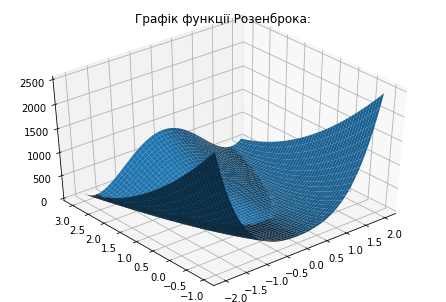

In [ ]:
print('Графік 1')
rozenbrock()

Застосуємо до функції Розенброка метод найскорішого спуску ***з постійним кроком***. В залежності від величини кроку та початкової точки, результати для перших 5000 ітерацій будут наступними:

Графік 2


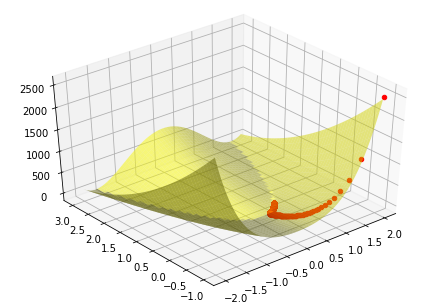


Отримана точка: (0.56, 0.31)


In [ ]:
print('Графік 2')
grad_discent_const(5000, 0.0001, 2, -1)

Графік 3


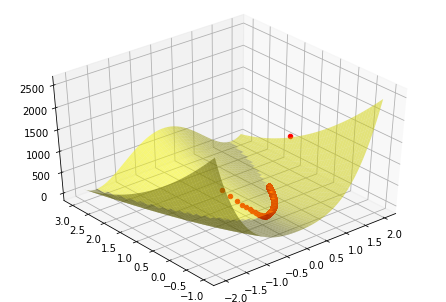


Отримана точка: (0.97, 0.94)


In [ ]:
print('Графік 3')
grad_discent_const(5000, 0.001, 2, 1.5)

Графік 4


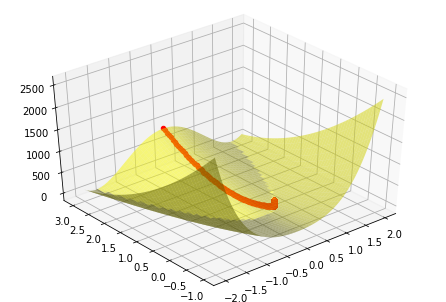


Отримана точка: (0.65, 0.42)


In [ ]:
print('Графік 4')
grad_discent_const(5000, 0.0001, 0, 3)

Застосуємо до функції Розенброка метод найскорішого спуску ***з оптимальним  кроком***. Для оптимізації кроку будемо використовувати один з методів одновимірного пошуку, наприклад, ***метод золотого перетину***. Попередньо реалізуємо його у функції gold_ratio(f, a, b, eps), де f - функція, яку треба дослідити на локальний мінімум на відрізку [a, b], eps - допустима похибка. Перевіримо роботу функції gold_ratio на прикладі пошуку локального мінімуму функції $y = x^2 - 5x + 5$ на відрізку [0, 5] (неважко перевірити, що точкою мінімуму буде 2.5). Нехай допустима похибка eps = 0.01.

In [ ]:
def f(x):
  return x ** 2 - 5 * x + 5

x = gold_ratio(f, 0, 5, 0.01) 
print(x)

2.502852531269397


Отже, функція працює коректно.


Метод найскорішого спуску ***з оптимальним кроком і критерієм закінчення***: $||\nabla f(x^{(k)})|| \leq \varepsilon$ на прикладі функції Розенброка.  

---

Параметри: початкова точка (0, 2), початковий крок lmd = 0.001, точність розрахунку eps = 0.001, точність одновимірного пошуку (метод золотого перетину) eps_lmd = 0.001.

Графік 5


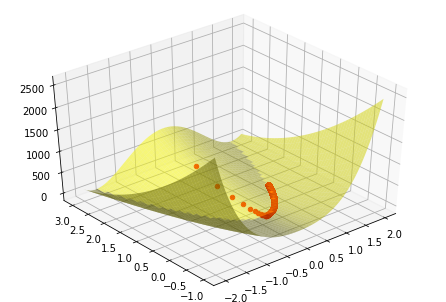


Отримана точка: (1.00, 1.00)
Кількість ітерацій: 6541
Час виконання: 32 сек


In [ ]:
print('Графік 5')

start = time.time()
grad_discent_optim1(0.001, 0, 2, 0.001, 0.001)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

Змінимо ***точність одновимірного пошуку*** до eps_lmd = 0.00001.

Графік 6


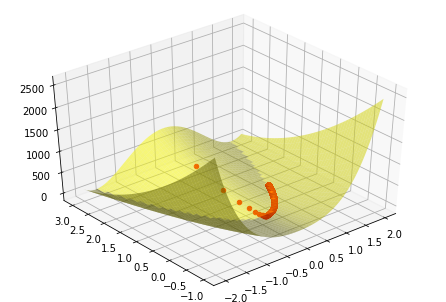


Отримана точка: (1.00, 1.00)
Кількість ітерацій: 4909
Час виконання: 24 сек


In [ ]:
print('Графік 6')

start = time.time()
grad_discent_optim1(0.001, 0, 2, 0.001, 0.00001)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

Метод найскорішого спуску ***з оптимальним кроком і критерієм закінчення:*** $\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    \|f(x_{k})-f(x_{k-1})\| \leq \varepsilon\\
\end{cases}$ на прикладі функції Розенброка.

---


Початкова точка (0, 2), початковий крок lmd = 0.001, точність розрахунку eps = 0.001, точність одновимірного пошуку (метод золотого перетину) eps_lmd = 0.00001.



Графік 7


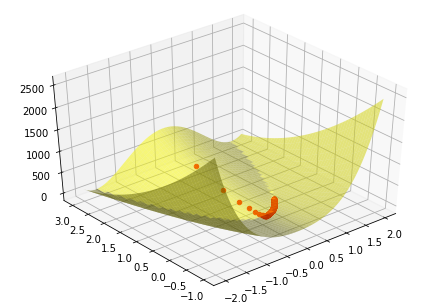


Отримана точка: (0.67, 0.45)
Кількість ітерацій: 399
Час виконання: 2 сек


In [ ]:
print('Графік 7')

start = time.time()
grad_discent_optim2(0.001, 0, 2, 0.001, 0.00001)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

Змінимо **точність розрахунку** на eps = 0.000001, ***точність одновимірного пошуку*** на eps_lmd = 0.000001.

Графік 8


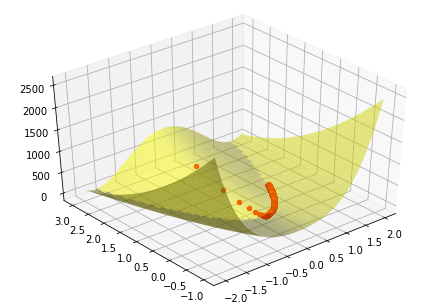


Отримана точка: (1.00, 1.00)
Кількість ітерацій: 5195
Час виконання: 25 сек


In [ ]:
print('Графік 8')

start = time.time()
grad_discent_optim2(0.001, 0, 2, 0.000001, 0.000001)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

Метод найскорішого спуску ***з постійним кроком і критерієм закінчення*** $||\nabla f(x^{(k)})|| \leq \varepsilon$ на прикладі функції Розенброка.

---

Параметри: крок lmd = 0.001, початкова точка (0, 2), точність розрахунку eps = 0.0001.

Графік 9


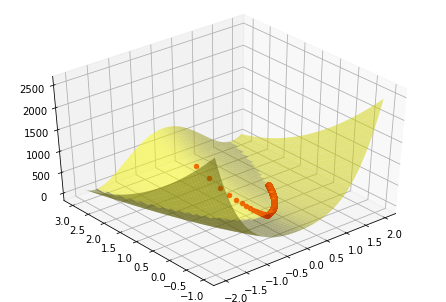


Отримана точка: (1.00, 1.00)
Кількість ітерацій: 16702
Час виконання: 84 сек


In [ ]:
print('Графік 9')

start = time.time()
grad_discent_const1(0.001, 0, 2, 0.0001)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

Метод найскорішого спуску ***з постійним кроком і критерієм закінчення*** $\begin{cases}
    \frac{\|x_{k} - x_{k-1}\|}{\|x_{k}\|} \leq \varepsilon\\
    \|f(x_{k})-f(x_{k-1})\| \leq \varepsilon\\
 \end{cases}$ на прикладі функції Розенброка. 

---

Параметри: крок lmd = 0.001; початкова точка (0, 2); точність розрахунку eps = 0.0001. 

Графік 10


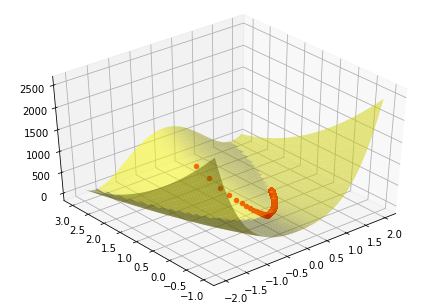


Отримана точка: (0.88, 0.78)
Кількість ітерацій: 2409
Час виконання: 13 сек


In [ ]:
print('Графік 10')

start = time.time()
grad_discent_const2(0.001, 0, 2, 0.0001)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

Змінимо **точність розрахунку** на eps = 0.000001.

Графік 11


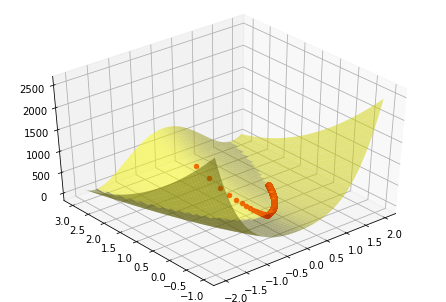


Отримана точка: (1.00, 1.00)
Кількість ітерацій: 11142
Час виконання: 53 сек


In [ ]:
print('Графік 11')

start = time.time()
grad_discent_const2(0.001, 0, 2, 0.000001)
end = time.time()
print('Час виконання: %d сек' %int(end - start))

## Висновки


Зображена на графіку 1 функція Розенброка задається рівнянням $~~z = (1-x)^{2} + 100(y-x^2)^2$. Її глобальний мінімум - точка (1, 1), в якій вона набуває значення 0.


На графіках 2 - 4 бачимо, що результати застосування до функції Розенброка методу найскорішого спуску з постійним кроком можуть істотньо відрізнятись в залежності від обраної початкової точки та кроку. Результати перших 5000 ітерацій можуть бути:

1) зовсім неточними (графік 2, графік 4);

2) відносно точними (графік 3).


На графіках 5 - 8 бачимо, що реалізації методу найскорішого спуску з оптимальним кроком можути мати різну ефективність та давати різні результати в залежності від точності використовуваного методу одновимірного пошуку, критерію закінчення, точності розрахунку та інших параметрів. 

На графіках 8 - 11 бачимо, що аналогічний висновок можна зробити стосовно до методу найскорішого спуску з постійним кроком (очевидно, окрім критеріїв до одновимірного пошуку, який у випадку постійного кроку не використовується).